사용할 데이터 셋
 - German dataset
 - Californai house price data set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

pd.options.display.max_columns=None

#### 미국 인구 dataset

In [2]:
df = pd.read_csv('state-population.csv')
df.head()

,state/region,ages,year,population
0,AL,under18,2012,1117489.0
1,AL,total,2012,4817528.0
2,AL,under18,2010,1130966.0
3,AL,total,2010,4785570.0
4,AL,under18,2011,1125763.0


#### 미국 주별 살인률 dataset

In [3]:
murder_dataset = pd.read_csv('./inputs/murders.csv')
murder_dataset.head()

,state,abb,region,population,total
0,Alabama,AL,South,4779736,135
1,Alaska,AK,West,710231,19
2,Arizona,AZ,West,6392017,232
3,Arkansas,AR,South,2915918,93
4,California,CA,West,37253956,1257


#### House dataset

In [4]:
housing_data = pd.read_csv('./inputs/housing.csv')
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


#### German credit dataset

In [5]:
# German credit data를 살펴보자.
german_dataset = pd.read_csv('./inputs/german_credit_data.csv',  index_col=0)

# 데이터에는 돈을 갚을 능력(Good/Bad)에 대한 데이터가 없다. 따라서 해당 data를 concat 하도록 하겠다.
# 돈을 갚을 능력(target 변수)을 나타내는 변수를 가지고 있는 데이터를 로드한다.
path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data'
dataset = pd.read_csv(path, delimiter=' ', header=None)

# 데이터를 concat
german_dataset = pd.concat([german_dataset, dataset.iloc[:,-1] - 1], axis=1)

# 컬럼 이름 변경
german_dataset.columns.values[-1] = 'Risk'
german_dataset.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,1
2,49,male,1,own,little,NaN,2096,12,education,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,0
4,53,male,2,free,little,little,4870,24,car,1


---

단일 학문으로서의 통계학은 지난 한 세기 동안 대부분의 발전을 이루었다. 통계학의 수학적 기반이라고 할 수 있는 확률론은 17세기에서 19세기에 걸쳐, 토머스 베이즈, 피에르시몽 드 라플라스, 카를 가우스가 이룬 업적을 기반으로 발전해왔다.

확률의 순수 이론적인 측면과는 달리, 통계학은 데이터 분석과 모델링을 다루는 일종의 응용과학이라고 할 수 있다. 엄밀한 의미의 과학적 학문의 하나로서, 현대 통계학은 1800년대 후반 프랜시스 골턴과 칼 피어슨까지 그 기원을 거슬러 올라간다.

20세기 초 **실험 계획법**과 **최대우도추정**의 핵심 개념을 소개한 로널드 피셔는 현대 통계학의 대표적인 선구자다. 이 두 개념을 비롯한 여러 통계 개념은 데이터 과학 곳곳에 깊숙이 자리하고 있다.

이러한 개념들이 데이터 과학과 빅데이터라는 측면에서 왜 중요한지, 동시에 부족한 것이 무엇인지를 정확히 파악해야 한다.

# Exploratory Data Analysis(EDA)

기계학습 알고리즘이 학습을 얼마나 잘 작동 하느냐는 전적으로 데이터의 품질과 데이터에 담긴 정보량에 달려있다. 따라서, 가능하면 정보를 잃지 않으면서 기계학습 알고리즘이 학습할 환경을 구비하는 것이 매우 중요하다.

데이터 과학에서의 데이터 프로세스의 목적
 - 현실세계에서 데이터를 수집하고, 데이터를 전처리하고, 정제된 데이터셋을 만든 뒤에 모형과 알고리즘을 개발하여 데이터 과학 결과물을 사람을 위한 의사결정에 사용
 - 데이터를 이용(분석)하여 만든 제품을 통해 알고리즘으로 현실세계에 영향을 주는 것. 
 
특히, 정제된 데이터셋과 모형, 알고리즘을 개발하는 과정에서 **탐색적 자료분석** 과정이 꼭 수반된다.

탐색적 자료 분석과정은 미국의 존 투키박사에 의해 창안되었다. 가설검증이나 모형을 적용하기 전에 데이터가 (스스로) 사람에게 정보를 전달하도록 만드는 방법으로 시각적인 기법을 사용하거나 5-숫자요약(5-number summary)를 사용하는 등 다양한 방법을 적용한다.

5-number summary
 - The minimum value
 - The first quartile
 - The median
 - The third quartile
 - The maximum value


탐색적 데이터 분석의 목적은 **데이터를 이해하는 것**이다. 목적 달성을 위한 가장 쉬운 방법은 질문을 잘 만들어 이를 탐색과정에 활용하는 것이다. 결국 데이터를 적절히 표현할 수 있는 수치(요약) 및 시각화 산출물을 만들어내고 이것을 통하여 다음 과정(모델링)을 위한 데이터를 생성해 내는 것이다.

질문의 질은 결국 질문의 양에 비례한다. 데이터에 대해 아는 것이 없기 때문에 질문의 질을 최대한 빨리 높이는 길은 한정된 시간에 가능하면 많은 질문을 생성해 내고, 탐색과정을 거쳐 최대한 빨리 좋은 질문을 생성해 내는 것이다.

## 1. 정형화된 데이터의 요소

---
#### 데이터 type의 종류

 - 연속형(continuous) : 일정 범위 안에서 어떤 값이든 취할 수 있는 데이터 (유의어 : 구간형, 실수형, 수치형, numerical 데이터)
 - 이산형(discrete) : 정수 값만 취할 수 있는 데이터 (유의어 : 정수형, 횟수 데이터)
 - 범주형(categorical) : 가능한 범주(category) 안의 값만을 취할 수 있는 데이터 (유의어 : 요인, 명목 데이터)
 - 이진형(binary) : 두 개의 값(0/1, 참/거짓) 만을 갖는 범주형 데이터의 특수한 경우 (유의어 : boolean 데이터)
 - 순서형(ordinal) : 값들 사이에 분명한 순위가 있는 범주형 데이터
 ---

## 2. Table 데이터

데이터 분석에서 가장 대표적으로 사용되는 객체(object)는 엑셀 스프레드시트나 데이터베이스의 테이블과 같은 table 데이터이다. Python에서는 pandas의 `DataFrame` 객체를 이용하여 table 데이터를 다룬다.

- 데이터 프레임(data frame) : 통계와 머신러닝 모델에서 가장 기본이 되는 테이블 형태의 데이터 구조, 행과 열을 가진 데이터 구조를 의미한다.
- 특성(feature) : 일반적으로 테이블의 각 column이 하나의 특성을 의미한다. (유의어 : 특징, 속성, 입력, 예측변수)
- 결과(outcome) : 데이터 과학(또는 머신러닝) 프로젝트의 목표는 대부분 어떤 결과를 예측하는 데 있다. 즉 데이터 과학에서 예측하고 싶어하는 것을 의미한다. (유의어 : 종속변수, 응답, 목표, label, target)
- Record : 테이블의 각 행을 의미한다. (유의어 : example, sample, instance, observation)

Table data는 기본적으로 각 record를 나타내는 행과, 특성(feature)를 나타내는 열로 이루어진 이차원 행렬이다.

In [6]:
# 미국 인구 데이터셋을 살펴보자.
df.head()

,state/region,ages,year,population
0,AL,under18,2012,1117489.0
1,AL,total,2012,4817528.0
2,AL,under18,2010,1130966.0
3,AL,total,2010,4785570.0
4,AL,under18,2011,1125763.0


통계학과 데이터 과학(머신러닝 영역)에서는 같은 의미를 서로 다른 용어로 표현하기도 한다.

(통계)
 - 예측변수(predictor variable)를 이용하여, 응답변수(response variable) 또는 종속변수(dependent variable)를 예측한다.

(데이터 과학)
 - 특성(feature)을 이용하여, 목표(target)를 예측한다.

## 3. Estimates of <font color=red>Location</font>
데이터를 표현하는 변수들은 수많은 다른 값을 갖을 수 있다. 데이터가 주어졌을 때, 데이터를 살펴보는 가장 기초적인 단계는 각 변수(feature)의 **typical value**(대표값)을 구하는 것이다. 이것은 곧 대부분의 값이 어디쯤에 위치하는지를 나타내는 추정값이다.(**central tendency**)

---
- 평균(mean) : 모든 값의 총합을 개수로 나눈 값 (유의어 : average)
- 가중평균(weighted mean) : 가중치를 곱한 값의 총합을 가중치의 총합으로 나눈 값 (유의어 : weighted average)
- 중간값(median) : 데이터에서 가장 가운데 위치한 값 (유의어 : 50번째 백분위수 percentile)
- 가중 중간값(weighted median) : 데이터를 정렬한 후, 각 가중치 값을 위에서부터 더할 때, 총합의 중간이 위치하는 데이터 값
- 절사평균(trimmed mean) : 정해진 개수의 극단값(extreme value)를 제외한 나머지 값들의 평균 (유의어 : 절단평균, truncated mean)
- 로버스트하다(robust) : 극단값들에 민감하지 않다는 것을 의미한다. (유의어 : 저항성 있다, resistant)
- 특잇값(outlier) : 대부분의 값과 매우 다른 데이터 값 (유의어 : 극단값)
---

통계학자들은 보통 데이터로부터 얻은 값과 실제 상태를 나타내는 이론적인 참값을 구분하기 위해, 데이터로부터 계산된 값들을 보통 **추정값(estimate)**라는 용어를 사용한다. 반면 데이터 과학자나 비지니스 분석가들은 이러한 값들을 **측정 지표(metric)**라고 부른다. 이러한 차이는 곧 통계학과 데이터 과학의 접근법의 차이를 반영한다. 

통계학이라는 분야는 궁극적으로 불확실성을 이해하고자 하는 반면, 데이터 과학은 구체적인 비지니스나 조직의 목표치에 관심을 둔다. 그러므로 통계학자들은 추정한다고 하고, 데이터 과학자들은 측정한다고 한다.

### 3.1. 평균
$n$개의 sample data $x_1, x_2, ,,,. x_n$의 평균을 계산하는 수식은 다음과 같다.
$$\bar{x}=\frac{\sum_{i=1}^{n}x_i}{n}$$

In [7]:
# 미국 인구수의 평균
df['population'].mean()

6805558.401347068

In [8]:
# Numeric data에 대한 통계정보를 모두 가지고 있다. (주의할 점 : 범주형 데이터가 숫자로 표현된 경우, 그것의 통계치도 모두 계산)
df.describe()

,year,population
count,2544.000000,2.524000e+03
mean,2001.500000,6.805558e+06
std,6.923547,2.855014e+07
min,1990.000000,1.013090e+05
25%,1995.750000,7.423805e+05
50%,2001.500000,1.597005e+06
75%,2007.250000,4.547104e+06
max,2013.000000,3.161288e+08


### 3.2. 절사평균
$n$개의 sample data를 크기 순으로 정렬한 후, 양끝에서 일정 개수의 값(각각 $p$)들을 삭제한 뒤 남은 값들을 $x_{(1)}, x_{(2)}, ..., x_{(i)}$라고 할 때 절사평균을 계산하는 수식은 다음과 같다.
$$\text{trimmed mean}=\frac{\sum_{i=p+1}^{n-p}x_{(i)}}{n-2p}$$

양끝을 제외하고 평균을 구하기 때문에, outlier를 제외할 가능성이 높아진다. 따라서 Trimmed mean은 outlier를 제거하고 robust한 추정을 하기 위한 estimate 중 하나이다. 데이터마다 달라지겠지만 일반적으로는 상위/하위 10%를 제거한다. 하지만 이 수치는 데이터의 분포에 따라 달라질 수 있다.

In [9]:
stats.trim_mean(df['population'], 0.1)

2620227.3605108056

### 3.3. 가중평균
각 데이터 값 $x_i$에 가중치 $w_i$를 곱한 값들의 총합을 다시 가중치의 총합으로 나눈 가중평균은 다음과 같은 수식으로 나타낼 수 있다.
$$\bar{x}_w=\frac{\sum_{i=1}^{n}w_ix_i}{\sum_{i=1}^{n}w_i}$$
 - 어떤 값들이 본래 다른 값들에 비해 큰 변화량을 갖을 때, 이러한 관측값에 대해 더 작은 가중치를 줄 수 있다. 예를 들어 여러 개의 센서로부터 평균을 구한다고 할 때, 한 센서의 정확도가 떨어진다면 그 센서에서 나온 데이터에는 낮은 가중치를 주는 것이 합리적일 것이다.
 - 데이터를 수집할 때, 우리가 관심 있는 서로 다른 대조군에 대해서 항상 똑같은 수가 얻어지지는 않는다. 예를 들어 온라인 실험을 진해했을 때, (물론 방법에 따라 다르겠지만) 모든 사용자 그룹에 대해 정확히 같은 비율을 반영하는 데이터를 수집하기는 참 어렵다. 이를 보정하기 위해서, 데이터가 부족한 소수 그룹에 대해 더 높은 가중치를 적용할 필요도 있을 것이다.

### 3.4 중간값
데이터를 일렬로 정렬했을 때, 한가운데에 위치하는 값을 중간값이라고 한다. 데이터의 개수가 짝수일 때는 가운데 있는 두 값의 평균 (실제 데이터 값이 아님)이다. 많은 경우, 데이터에 매우 민감한 평균보다는 중간값이 estimate에 유리하다.
 - 시애틀 거주민들의 가계소득을 추정해보자. 빌 게이츠(시애틀 메니나 거주)를 포함해서 가계소득의 평균을 계산하는 것이 가계소득 추정에 유리할까? 메니다 거주민의 중간값을 선택하는것이 유리할까?
 
중간값은 특잇값(극단값, outlier)에 영향을 받지 않으므로 **robust estimate**(로버스트 추정방법)이라고 알려져 있다. 

In [10]:
# Dataframe method 이용
df['population'].median()

1597005.0

### 3.5 가중 중간값
중간값을 계산할 때와 마찬가지로 먼저 데이터를 정렬한 후(각 데이터는 weight를 가지고 있다.), 하위 절반의 가중치 합이 상위 절반의 가중치 합과 동일한 위치를 찾는다. 이 위치의 값이 가중 중간값(weighted median)이다. 중간값과 마찬가지로 가중 중간값도 robust estimate으로 알려져 있다.

### 3.6 특잇값
특잇값(극단값, outlier)은 데이터 집합에서 대부분의 값들과는 매우 멀리 동떨어져 있는 값들을 의미한다. 특잇값은 데이터 값 자체가 유효하지 않다거나 잘못되었다는 뜻이 아니다(소득 추정에서, 빌 게이츠 또는 제프 베조스의 소득 같은 경우). 물론, 결과적으로 에러 값들이 특잇값에 나타나기도 한다. 예를 들어, 데이터를 수집할 때 m(미터) 단위로 수집해야 하는데, 기계 결함으로 인해 km(킬로미터) 단위가 수집 된 경우이다. km의 값이 m보다는 작기 때문에, 이런 에러 값들이 특이값으로 나타날 수 있다. 따라서 이러한 특잇값들을 확인하고 자세히 살펴볼 필요가 있다.

## 4. Estimates of <font color=red>Variability</font> (변동, 변이 추정)

---
- 편차(deviation) : 관측값과 위치 추정값(estimates of location) 사이의 차이 (유의어 : 오차, 잔차)
- 분산(variance) : 평균과의 편차를 제곱한 값들의 합을  <font color=red>$n-1$</font>로 나눈 값. $n$은 데이터 개수 (유의어 : 평균제곱 오차)
- 표준편차(standard deviation) : 분산의 제곱근
- 평균절대편차(mean absolute deviation) : 평균과의 편차의 절대값의 평균
- 중간값의 중위절대편차(median absolute deviation form the median) : 중간값과의 편차의 절대값의 중간값
- 범위(range) : 데이터의 최댓값과 최솟값의 차이
- 순서통계량(order statistics) : 최소에서 최대까지 정렬된 데이터 값에 따른 계량형 (유의어 : 순위)
- 백분위수(percentile) : 어떤 값들의 $P$퍼센트가 이 값 혹은 더 작은 값을 갖고, $(100-P)$퍼센트가 이 값 혹은 더 큰 값을 갖도록 하는 값 (유의어 : 분위수)
- 사분위범위(Interquartile Range) : 75번째 백분위수와 25번째 백분위수 사이의 차이 (유의어 : IQR)
---

### 4.1 편차 (deviation)
관측 데이터와 위치 추정값 사이의 차이이다. 데이터가 평균 또는 중간값을 기준으로 얼마나 퍼져 있는지 말해준다.

### 4.2. 평균절대편차

Variability를 측정하는 방법 중 하나는, 편차들의 대푯값을 추정하는 것이다. 편차 자체의 평균을 구하는 것은 바람직하지 않다. 음의 편차가 양의 편차를 상쇄하기 때문이다. 따라서 편차의 절대값의 평균을 구할 수 있다. 이것이 평균절대편차이다.
$$\text{평균절대편차} = \frac{\sum_{i=1}^{n}|x_i-\bar{x}|}{n} \text{  ,where  } \bar{x} \text{ 는 표본평균이다. }$$

In [11]:
# Pandas의 mad를 계산하는 method 사용
df.population.mad()

8238925.345578629

### 4.3. 분산과 표준편차
분산은 평균과의 편차의 제곱들의 평균이고, 표준편차는 분산의 제곱근이다.
$$\text{분산}=s^2=\frac{\sum_{i=1}^{n}(x-\bar{x})^2}{n-1}$$
$$\text{표준편차}=s=\sqrt{\text{분산}}$$

표준편차는 원래 데이터와 같은 척도(scale)에 있기 때문에 분산보다 훨씬 해석하기 쉽다. 통계학에서 평균절대편차보다 표준편차를 더 선호하는 이유는? 수학적으로 제곱한 값이 절대값보다 통계 모델을 다루는 데 더 편리하기 때문이다. 분산과 표준편차는 특잇값에 민감하다. 특잇값의 의존성을 줄이기 위해 trimmed 표준편차를 계산할 수 있다. (trimmed 평균을 사용하면 된다.)

In [12]:
# Pandas의 std를 계산하는 메소드 사용
df.population.std()

28550144.966823243

In [13]:
# Trimmed 표준편차를 구하는 Scipy 메소드를 사용
stats.trim_mean(df['population'], 0.1)

2620227.3605108056

---

(Advanced)

<font color=green>자유도(degree of freedom)</font>라는 개념을 설명할 때 등장하는 논의가 있다. 표본 분산을 구할 때 왜 $n$이 아닌 $n-1$을 분모로 사용하는지에 대한 논의이다. 사실, $n$이 충분히 커서 $n$으로 나누든 $n-1$로 나누든 차이가 없다면 이러한 구분이 별로 중요하지 않을 것이다. 

표본을 가지고 모집단을 추정하고자 한다는 전제를 기본으로 하자.

만약 분산 수식에 $n$을 분모로 사용한다면, 모집단의 분산과 표준편차의 참값을 과소평가하게 된다. 이를 편향(biased) 추정이라고 부른다. 하지만 만약 $n$ 대신 $n-1$로 나눈다면, 분산은 비편향(unbiased) 추정이 된다. 이것은 다음 수식들을 이용하면 수학적으로 증명할 수 있다. 
- $E(X_i^2)=\sigma^2+\mu^2$
- $E(\bar{x}^2)=\frac{\sigma^2}{n}+\mu^2$
- $E[\sum_{i=1}^{n}(X_i-\bar{X})^2]=(n-1)\sigma^2$

결론적으로 $s^2=\frac{1}{n}\sum_{i=1}^{n-1}(X_i-\bar{X})^2$이 되어야지, $E(s^2)=\sigma^2$이 된다.

왜 $n$을 사용하는 것이 편향 추정이 되는지를 설명하려면, 추정값을 계산할 때 제약 조건(constraint)과 관계있는 자유도에 대해 언급할 필요가 있다. 표준편차는 표본의 평균에 따른다는 하나의 제약 조건을 가지고 있기 때문에 $n-1$의 자유도를 갖는다.

보통 대부분의 경우 데이터 과학자들은 자유도에 크게 신경 쓰지 않아도 된다.

---

### 4.4 중간값의 중위절대편차
로버스트한 variability 추정값이다.
$$\text{중간값의 중위절대편차}=\text{median}(|x_1-m|, |x_2-m|, ..., |x_n-m|) \text{  , where  } m \text{ 은 중간값}$$


### 4.5 순서통계량
정렬된 데이터가 얼마나 퍼져있는지를 이용하여 데이터의 variability를 추정할 수 있으며, 정렬 데이터를 나타내는 통계량을 **순서통계량**이라고 부른다. 데이터내의 가장 큰 값과 가장 작은 값의 차이를 나타내는 것이 range(범위)이다. 이 값은 특잇값에 매우 민감하다.

백분위수(percentile)는 어떤 값들의 $P$퍼센트가 이 값 혹은 더 작은 값을 갖고, $(100-P)$퍼센트가 이 값 혹은 더 큰 값을 갖도록 하는 값을 말한다.

Variability를 측정하는 대표적인 순서통계량은 **사분위범위(Interquartile Range, IQR)** 이다. 25번째 백분위수와 75번째 백분위수의 차이를 보는 것이다.

(간단한 예제) `3, 1, 5, 3, 6, 7, 2, 9의 IQR은 (2.5, 6.5)이다.`

---
(Advanced)

데이터의 크기 $n$이 짝수이면, 백분위수는 기준이 되는 $x_{i}$, $x_{i+1}$의 사이에 어떤 값을 취할 수 있다. 백분위수의 명확한 정의는 다음과 같다.
$$100\times\frac{i}{n} \leq P < 100 \times \frac{i+1}{n}$$

보통 다음과 같은 가중 평균에서 구한다. $P=(1-w)x_{(i)}+wx_{(i+1)}$, $0\leq w \leq 1$ 이다.

---

## 5. 데이터 분포 탐색하기
데이터가 전반적으로 어떻게 분포하고 있는지 알아보는 것

---
- 상자그림(boxplot) : 데이터의 분포를 시각화하기 위해 간단한 방법으로 소개한 그림 (상자 수염도)
- 도수분포표(frequency tagle) : 어떤 구간(interval)에 해당하는 수치 데이터 값들의 빈도를 나타내는 기록
- 히스토그램(histogram) : $x$축은 구간들을, $y$축은 빈도수를 나타내는 도수 테이블의 그림
- 밀도 그림(density plot) : 히스토그램을 부드러운 곡선으로 나타낸 그림. 커널밀도추정(Kernel density estimation)을 주로 사용한다.
---

---
(Advanced)

- 위치(Location) : 분포의 1차 적률(모멘트)
- 변위(variability) : 분포의 2차 적률(모멘트)
- 왜도(skewness) : 분포의 3차 모멘트. 데이터가 큰 값이나 작은 값 쪽으로 얼마나 비스듬히 쏠려 있는지를 나타내는 척도.
- 첨도(kurtosis) : 분포의 4차 모멘트. 데이터가 극단값을 갖는 경향성을 나타내는 척도.

보통은 이러한 모멘트 값들을 직접 구하기보다는 상자 그림, 도수분포표를 이용하여 직접 확인한다. 

---

### 5.1. 백분위수와 상자그림

In [14]:
# 인구에 대한 분포를 살펴보자.
population = murder_dataset['population']

In [15]:
# 25 백분위수
np.percentile(population, 25)

1696961.5

In [16]:
# 50 백분위수
print('50백분위수 :', np.percentile(population, 50))
print('Median : ', np.median(population))

50백분위수 : 4339367.0
Median :  4339367.0


In [17]:
# 75 백분위수
np.percentile(population, 75)

6636084.5

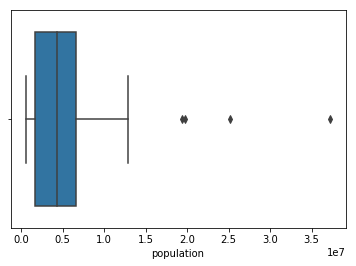

In [18]:
# Boxplot을 그리자.
sns.boxplot(x=population)

minimum = $Q1 - 1.5 \times \text{IQR}$

maximum = $Q3 + 1.5 \times \text{IQR}$

### 5.2. 히스토그램

Text(0,0.5,'frequency')

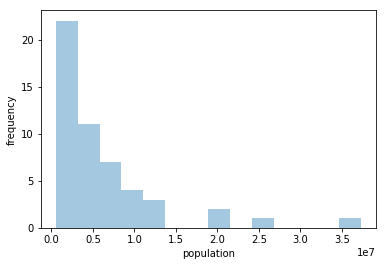

In [19]:
sns.distplot(population, kde=False)
plt.ylabel('frequency')

### 5.3. 밀도 그림

In [20]:
# 인수 10만 명당, 살인 사건 발생 횟수에 대해서 살펴보자.
murder_dataset['rate'] = murder_dataset['total'] / murder_dataset['population'] * 100000

In [21]:
murder_dataset.head()

,state,abb,region,population,total,rate
0,Alabama,AL,South,4779736,135,2.824424
1,Alaska,AK,West,710231,19,2.675186
2,Arizona,AZ,West,6392017,232,3.629527
3,Arkansas,AR,South,2915918,93,3.189390
4,California,CA,West,37253956,1257,3.374138


Text(0,0.5,'rate')

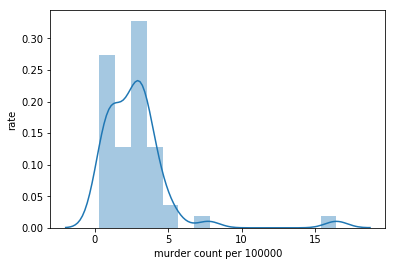

In [22]:
sns.distplot(murder_dataset.rate)
plt.xlabel('murder count per 100000')
plt.ylabel('rate')

## 6. 이진 데이터와 범주 데이터 탐색하기

---

- 최빈값(mode) : 데이터에서 가장 자주 등장하는 범주 혹은 값
- 막대도표(bar chart) : 각 범주의 빈도수 혹은 비율을 막대로 나타낸 그림
- 파이그림(pie chart) : 각 범주의 빈도수 혹은 비율을 원의 부채꼴 모양으로 나타낸 그림

---

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

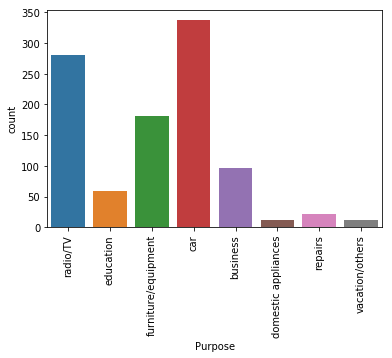

In [23]:
# (German credit data) 사람들이 돈을 빌리는 이유가 무엇일까? 가장 많은 빈도수의 카테고리를 분석한다.
sns.countplot(x='Purpose', data=german_dataset)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

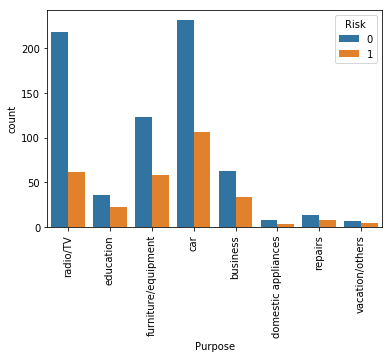

In [24]:
# (German credit data) 각 카테고리별로 돈을 잘 갚는(신용도가 좋은) 사람들의 비율을 분석해보자.
sns.countplot(x='Purpose', hue='Risk', data=german_dataset)
plt.xticks(rotation=90)

## 7. 상관관계

---

- 상관계수(correlation coefficient) : 수치적 변수들 간에 어떤 관계가 있는지를 나타내기 위해 사용되는 측정량(-1에서 +1까지의 범위)
- 상관행렬(correlation matrix) : 행과 열이 변수들을 의미하는 표를 말하며, 각 셀은 그 행과 열에 해당하는 변수들 간의 상관관계를 의미한다.
- 산점도(scatterplot) : 데이터를 좌표평면위에 점(point)으로 표현하여 데이터의 퍼져있는 정도를 한 눈에 볼 수 있는 시각화 자료이다.

---

### 7.1. 상관계수(피어슨 상관계수)
예측에 사용되는 변수 $X$와 예측 결과를 나타내는 변수 $Y$를 비교해보자.
- 변수 $X$와 $Y$는 서로 양의 상관관계를 갖는다.
     - $X$가 큰 값을 가지면 $Y$도 큰 값을 갖음.
     - $X$가 작은 값을 가지면 $Y$도 작은 값을 갖음.
 
- 변수 $X$와 $Y$는 서로 음의 상관관계를 갖는다.
     - $X$가 큰 값을 가지면 $Y$는 작은 값을 갖음.
     - $X$가 작은 값을 가지면 $Y$는 큰 값을 갖음.
     
$$r=\frac{\sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y})}{(n-1)s_xs_y}$$

변수들이 선형적인 관계를 갖지 않을 경우, 상관계수는 더 이상 유용한 측정 지표가 아니다.

상관계수는 표준화된 측정 지표라고 할 수 있다. 값의 범위는 -1에서 1사이에 존재한다. 상관계수가 0이라는 것은 아무런 상관성이 없다는 것을 의미한다. 하지만 데이터를 랜덤하게 재배치하면 우연히 상관계수가 양수나 음수가 될 수도 있다는 점을 알고 있어야 한다.

In [25]:
# (Housing price data) 캘리포니아 집 값 데이터에서 집 값과, 다른 특성간의 상관관계를 살펴보자.
# 스피어만의 상관관계 (상관행렬을 return). Pandas의 dataframe에서 제공해주는 method를 사용.
corr = housing_data.corr()

In [26]:
corr['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

### 7.2. 상관행렬

In [27]:
# (Housing price data) Pandas에서 제공해주는 상관행렬이다.
corr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


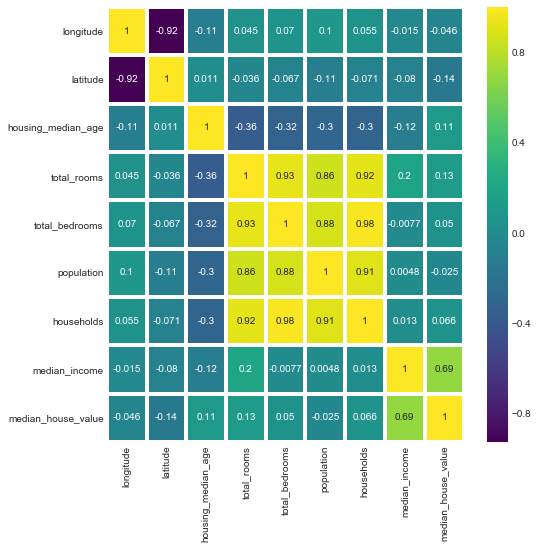

In [28]:
# (Housing price data) 상관행렬을 보는 또 다른 방법은 heatmap을 이용하여 분석시 시각화의 도움을 받는것이다.
sns.set({'figure.figsize': (8, 8), 'font.size': 10})
sns.heatmap(corr, cmap='viridis', annot=True, linewidth=3)

### 7.3. 산점도

`scatter_matrix`를 사용한다.

In [29]:
from pandas.plotting import scatter_matrix

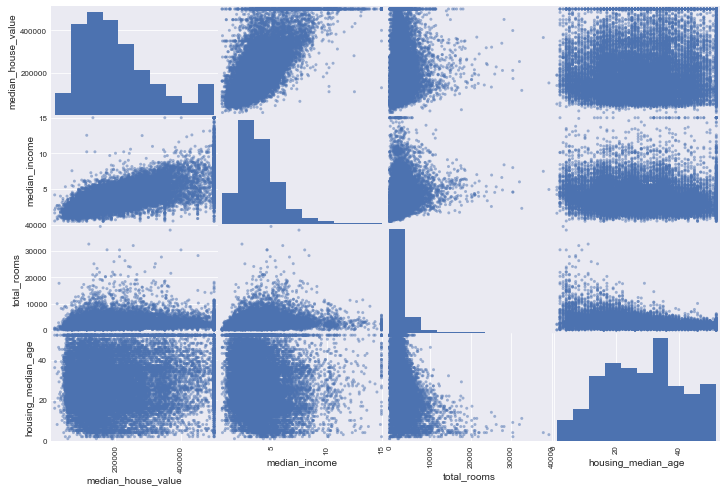

In [30]:
# (Housing price dataset) 상관관계를 산점도로 표현
attrs = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing_data[attrs], figsize=(12, 8))
plt.show()

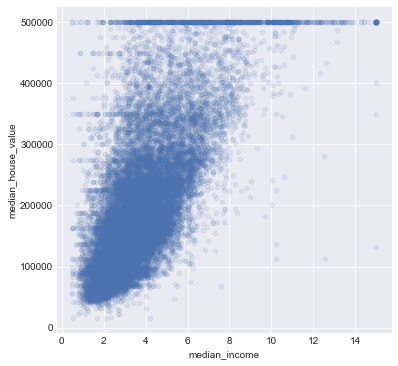

In [31]:
# (Housing price dataset) 상관관계가 가장 높은 feature만 산점도를 다시 확인해자.
sns.set({'figure.figsize': (6, 6), 'font.size': 10})
housing_data.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1)

# 8. 두 개 이상의 변수를 탐색

- 일변량분석(univariate analysis) : 1개의 변수를 다루는 분석
- 이변량분석(bivariate analysis) : 2개의 변수를 다루는 분석
- 다변량분석(multivariate analysis) : 3개 이상의 변수를 다루는 분석

## 8.1. 수치형 변수 vs 수치형 변수 분석

산점도는 데이터가 적을 때, 비교적 유용하나 데이터가 많은 경우는 산점도의 점들이 밀집되어 있어서 알아보기 어렵다. 이런 경우, 밀도를 나타낼 줄 수 있는 시각화 방법을 이용하면 분석시에 용이하다. Heatmap, joint distribution 비교 등의 방법이 사용된다.

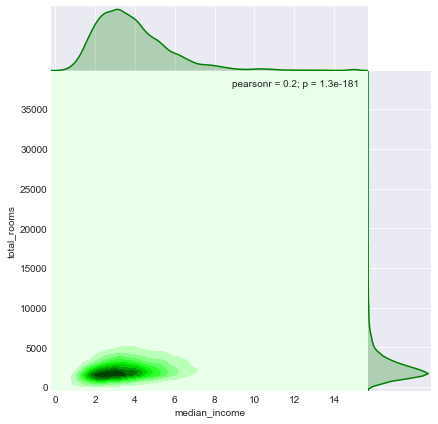

In [32]:
# (Housing price dataset) Median income과 total room을 비교해보자.
sns.jointplot(x='median_income', y='total_rooms', data=housing_data, kind="kde", space=0, color="g")

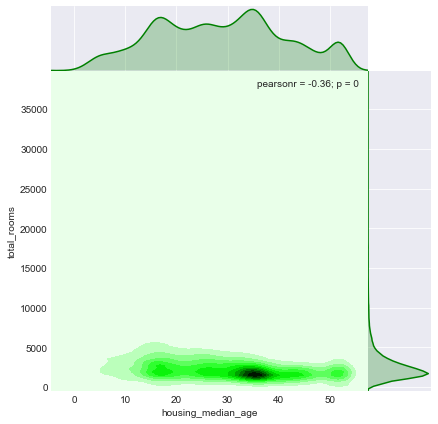

In [33]:
# (Housing price dataset) Housing median age과 total room을 비교해보자.
sns.jointplot(x='housing_median_age', y='total_rooms', data=housing_data, kind="kde", space=0, color="g")

## 8.2. 범주형 변수 vs 범주형 변수
 -  분할표(contingency table)은 두 가지 이상의 범주형 변수의 빈도수를 기록한 표이다.

In [34]:
# (German credit 데이터)
german_dataset.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,1
2,49,male,1,own,little,NaN,2096,12,education,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,0
4,53,male,2,free,little,little,4870,24,car,1


In [35]:
# (German credit 데이터) Sex, Housing, Purpose, Risk는 모두 범주형 데이터이다.
pd.crosstab([german_dataset['Sex'], german_dataset['Housing']], german_dataset['Risk'], margins=True)

Risk              0    1   All
Sex    Housing                
female free       8   11    19
       own      137   59   196
       rent      56   39    95
male   free      56   33    89
       own      390  127   517
       rent      53   31    84
All             700  300  1000

Contingency table을 이용해 카이제곱검정, crammer v stats도 구할 수 있다.

## 8.3 범주형 변수 vs 수치형 변수

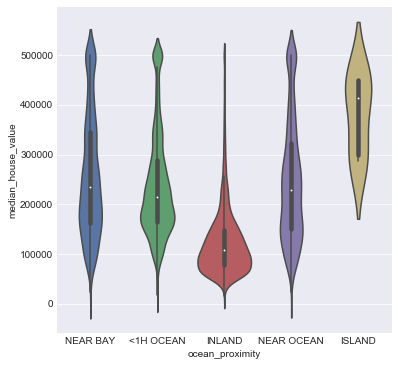

In [36]:
# (Housing data) : 해변가와의 거리(범주형 변수)와 집 값(수치형 변수)를 비교해보자.
sns.violinplot(x='ocean_proximity', y='median_house_value', data=housing_data)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

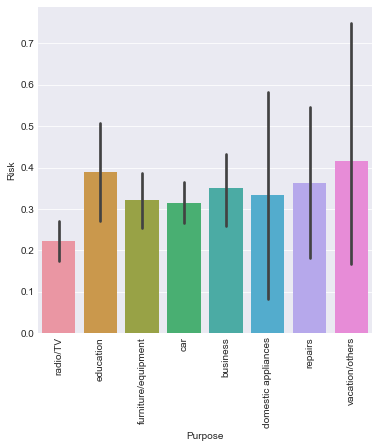

In [37]:
# (German credit data) : 대출을 받는 목적(범주형 변수)에 따라, 사람들이 부채를 상환하는지의 여부인 상환률(수치형 변수)을 비교해보자.
sns.barplot(x='Purpose', y='Risk', data=german_dataset)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

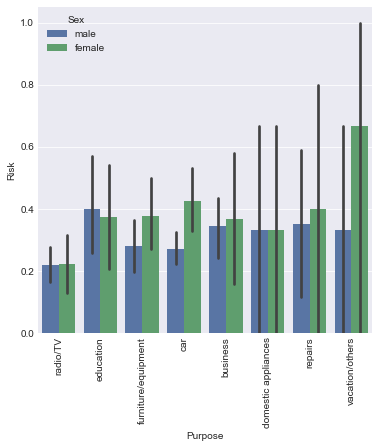

In [38]:
# (German credit data)
sns.barplot(x='Purpose', y='Risk', hue='Sex', data=german_dataset)
plt.xticks(rotation=90)